# Equipo: 3
# Grupo: 002, Miércoles
## Integrantes: 
- 1941502 Vidal Mosqueda Cristina
- 1811901 García Salazar Orlando
- 1644680 Macías Cortés Isaí Adriel
- 1849522 Mora Martínez Gerardo

## Base de datos principal
### **US Consumer Finance Complaints**

- **Url:** https://www.kaggle.com/cfpb/us-consumer-finance-complaints

## Introducción: 
Los servicios bancarios suelen presentar fallas, por lo que a consecuencia de esto, los clientes presentan quejas hacia los bancos. Nuestra base de datos se basa en las quejas que presentan los consumidores a los bancos estadounidenses.

## Descripción de los datos: 
Son reclamos hechos por los clientes, las cuales, son registradas por la CFPB (Consumer Financial Protection Bureau) que se introducen a una base de datos que generan una matriz de todas las quejas financieras que se hicieron en Estados Unidos de América.

## Descripción de las columnas:
De nuestra limpieza de la base de datos, las columnas que la conforma son: 
- **date_received:** Fecha en la que la queja fue enviada por el cliente (**Tipo de dato:** Fecha).
- **product:** El producto financiero referente a la queja que solicitó el cliente (**Tipo de dato:** Cadena de texto).
- **issue:** El título general establecido para identificar la queja del cliente (**Tipo de dato:** Cadena de texto).
- **company:** El banco en el que el cliente solicitó el servicio (**Tipo de dato:** Cadena de texto).
- **state:** Estado en el que esta localizado el banco (**Tipo de dato:** Cadena de texto).
- **submitted_via:** Medio por el cual la queja fue enviada (**Tipo de dato:** Cadena de texto).
- **date_sent_to_company:** Fecha en la que se recibió al banco el reclamo del cliente (**Tipo de dato:** Fecha).
- **company_response_to_consumer:** Respuesta del banco hacia el consumidor (**Tipo de dato:** Cadena de texto).
- **timely_response:** Especifica si la queja fue contestada en el tiempo establecido del banco (**Tipo de dato:** Cadena de texto).
- **consumer_disputed:** Especifica si el cliente quedó satisfecho con la solución(**Tipo de dato:** Cadena de texto).

## Justificación del uso de datos:
Nos llamó la atención los tipos de quejas y los productos financieros a los que se estaban refiriendo.Creemos que con estos datos podemos identificar el mejor estado con mayor sastifacción al cliente respecto al resultado de su queja.

## Objetivos Principales:
- Encontrar los 5 bancos más grandes de USA
- Encontrar el estado con mayor quejas en los bancos más grandes de USA.
- Del estado con mayor quejas, encontrar dentro de los 5 bancos más grandes, cuál tendrá mayor predicción de clientes satisfechos dentro de 6 meses.


## Programación:
- **Título:** "US Consumer Finance Complaints"
- **Url:** https://www.kaggle.com/cfpb/us-consumer-finance-complaints

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
#Lectura de archivo
df = pd.read_csv("consumer_complaints.csv",encoding='utf8')
#Se corre una vez estas 2 líneas para convertir de tipo objeto a fecha
df['date_sent_to_company'] = df['date_sent_to_company'].apply(lambda _ : datetime.strptime(_,"%m/%d/%Y"))
df=df.groupby(df['date_sent_to_company'].dt.strftime("%Y%m")).count()
df=df.drop(['date_received','sub_product','issue','sub_issue','consumer_complaint_narrative','company_public_response','company','state','zipcode','tags','consumer_consent_provided','submitted_via','company_response_to_consumer','timely_response','consumer_disputed?','complaint_id','date_sent_to_company'],axis = 1)
df.to_csv('Regresión.csv', index = False)
df

C:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (5,11) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,product
date_sent_to_company,
201112,2343
201201,2709
201202,3236
201203,6064
201204,5669
201205,6594
201206,8409
201207,6694
201208,7536


In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
#Lectura de archivo
df = pd.read_csv("Base_Limpia_Quejas_Financieras.csv",encoding='utf8')

df = df.drop(df[df['Diminutivo_de_Estado_de_USA']=="AA"].index)
df = df.drop(df[df['Diminutivo_de_Estado_de_USA']=="PW"].index)
df = df.drop(df[df['Diminutivo_de_Estado_de_USA']=="AS"].index)
df = df.drop(df[df['Diminutivo_de_Estado_de_USA']=="MP"].index)
df = df.drop(df[df['Diminutivo_de_Estado_de_USA']=="MH"].index)
df = df.drop(df[df['Diminutivo_de_Estado_de_USA']=="FM"].index)
df = df.drop(df[df['Diminutivo_de_Estado_de_USA']=="GU"].index)
df = df.drop(df[df['Diminutivo_de_Estado_de_USA']=="VI"].index)
df = df.drop(df[df['Diminutivo_de_Estado_de_USA']=="AP"].index)
df = df.drop(df[df['Diminutivo_de_Estado_de_USA']=="AE"].index)

Jpmorgan = df.drop(df[df['Banco']!='JPMorgan Chase & Co.'].index)
Banka = df.drop(df[df['Banco']!='Bank of America'].index)
Wells = df.drop(df[df['Banco']!='Wells Fargo & Company'].index)
Citi = df.drop(df[df['Banco']!='Citibank'].index)
Bancorp = df.drop(df[df['Banco']!='U.S. Bancorp'].index)

In [49]:
Jpmorgan=Jpmorgan.groupby(['Diminutivo_de_Estado_de_USA']).count()
Jpmorgan=Jpmorgan.drop(['Fecha_Enviada_por_el_Cliente','Queja','Banco','Medio_de_Envío','Fecha_Recibida_al_Banco','company_response_to_consumer','¿Se_evaluó_a_tiempo_la_respuesta_de_la_queja?','¿Cliente_insastifecho_a_la_solución?'],axis = 1)

Banka=Banka.groupby(['Diminutivo_de_Estado_de_USA']).count()
Banka=Banka.drop(['Fecha_Enviada_por_el_Cliente','Queja','Banco','Medio_de_Envío','Fecha_Recibida_al_Banco','company_response_to_consumer','¿Se_evaluó_a_tiempo_la_respuesta_de_la_queja?','¿Cliente_insastifecho_a_la_solución?'],axis = 1)

Wells=Wells.groupby(['Diminutivo_de_Estado_de_USA']).count()
Wells=Wells.drop(['Fecha_Enviada_por_el_Cliente','Queja','Banco','Medio_de_Envío','Fecha_Recibida_al_Banco','company_response_to_consumer','¿Se_evaluó_a_tiempo_la_respuesta_de_la_queja?','¿Cliente_insastifecho_a_la_solución?'],axis = 1)

Citi=Citi.groupby(['Diminutivo_de_Estado_de_USA']).count()
Citi=Citi.drop(['Fecha_Enviada_por_el_Cliente','Queja','Banco','Medio_de_Envío','Fecha_Recibida_al_Banco','company_response_to_consumer','¿Se_evaluó_a_tiempo_la_respuesta_de_la_queja?','¿Cliente_insastifecho_a_la_solución?'],axis = 1)

Bancorp=Bancorp.groupby(['Diminutivo_de_Estado_de_USA']).count()
Bancorp=Bancorp.drop(['Fecha_Enviada_por_el_Cliente','Queja','Banco','Medio_de_Envío','Fecha_Recibida_al_Banco','company_response_to_consumer','¿Se_evaluó_a_tiempo_la_respuesta_de_la_queja?','¿Cliente_insastifecho_a_la_solución?'],axis = 1)

In [50]:
Jpmorgan.sort_values(by="Producto_Financiero",ascending=False).head(1)

,Producto_Financiero
Diminutivo_de_Estado_de_USA,
CA,6031


In [51]:
Banka.sort_values(by="Producto_Financiero",ascending=False).head(1)

,Producto_Financiero
Diminutivo_de_Estado_de_USA,
CA,10740


In [52]:
Wells.sort_values(by="Producto_Financiero",ascending=False).head(1)

,Producto_Financiero
Diminutivo_de_Estado_de_USA,
CA,8084


In [53]:
Citi.sort_values(by="Producto_Financiero",ascending=False).head(1)

,Producto_Financiero
Diminutivo_de_Estado_de_USA,
CA,3676


In [54]:
Bancorp.sort_values(by="Producto_Financiero",ascending=False).head(1)

,Producto_Financiero
Diminutivo_de_Estado_de_USA,
CA,1701


In [55]:
df = df.drop(df[df['Diminutivo_de_Estado_de_USA']!="CA"].index)
df = df.drop(df[df['¿Cliente_insastifecho_a_la_solución?']!="No"].index)

Jpmorgan1 = df.drop(df[df['Banco']!='JPMorgan Chase & Co.'].index)
Banka1 = df.drop(df[df['Banco']!='Bank of America'].index)
Wells1 = df.drop(df[df['Banco']!='Wells Fargo & Company'].index)
Citi1 = df.drop(df[df['Banco']!='Citibank'].index)
Bancorp1 = df.drop(df[df['Banco']!='U.S. Bancorp'].index)
Jpmorgan1

,Fecha_Enviada_por_el_Cliente,Producto_Financiero,Queja,Banco,Diminutivo_de_Estado_de_USA,Medio_de_Envío,Fecha_Recibida_al_Banco,company_response_to_consumer,¿Se_evaluó_a_tiempo_la_respuesta_de_la_queja?,¿Cliente_insastifecho_a_la_solución?
148,09/24/2013,Mortgage,"Loan modification,collection,foreclosure",JPMorgan Chase & Co.,CA,Web,09/25/2013,Closed with explanation,Yes,No
204,09/24/2013,Bank account or service,"Account opening, closing, or management",JPMorgan Chase & Co.,CA,Web,10/09/2013,Closed with explanation,Yes,No
356,09/24/2013,Mortgage,"Application, originator, mortgage broker",JPMorgan Chase & Co.,CA,Web,09/26/2013,Closed with monetary relief,Yes,No
628,09/10/2013,Mortgage,"Loan modification,collection,foreclosure",JPMorgan Chase & Co.,CA,Referral,09/11/2013,Closed with explanation,Yes,No
675,09/01/2013,Debt collection,Disclosure verification of debt,JPMorgan Chase & Co.,CA,Web,08/31/2013,Closed with explanation,Yes,No
...,...,...,...,...,...,...,...,...,...,...
549651,04/04/2016,Credit card,Billing disputes,JPMorgan Chase & Co.,CA,Web,04/04/2016,Closed with non-monetary relief,Yes,No
549965,12/10/2015,Mortgage,"Loan modification,collection,foreclosure",JPMorgan Chase & Co.,CA,Web,12/10/2015,Closed with explanation,Yes,No
550211,03/15/2016,Mortgage,"Loan modification,collection,foreclosure",JPMorgan Chase & Co.,CA,Referral,03/17/2016,Closed with explanation,Yes,No
550235,03/30/2016,Mortgage,"Loan modification,collection,foreclosure",JPMorgan Chase & Co.,CA,Web,04/01/2016,Closed with explanation,Yes,No


In [56]:
#Se corre una vez estas 2 líneas para convertir de tipo objeto a fecha
Jpmorgan1['Fecha_Recibida_al_Banco'] = Jpmorgan1['Fecha_Recibida_al_Banco'].apply(lambda _ : datetime.strptime(_,"%m/%d/%Y"))
Jpmorgan1=Jpmorgan1.groupby(Jpmorgan1['Fecha_Recibida_al_Banco'].dt.strftime("%Y %m")).count()
Jpmorgan1=Jpmorgan1.drop(['Fecha_Enviada_por_el_Cliente','Queja','Banco','Medio_de_Envío','Fecha_Recibida_al_Banco','company_response_to_consumer','¿Se_evaluó_a_tiempo_la_respuesta_de_la_queja?','¿Cliente_insastifecho_a_la_solución?','Diminutivo_de_Estado_de_USA'],axis = 1)

Banka1['Fecha_Recibida_al_Banco'] = Banka1['Fecha_Recibida_al_Banco'].apply(lambda _ : datetime.strptime(_,"%m/%d/%Y"))
Banka1=Banka1.groupby(Banka1['Fecha_Recibida_al_Banco'].dt.strftime("%Y %m")).count()
Banka1=Banka1.drop(['Fecha_Enviada_por_el_Cliente','Queja','Banco','Medio_de_Envío','Fecha_Recibida_al_Banco','company_response_to_consumer','¿Se_evaluó_a_tiempo_la_respuesta_de_la_queja?','¿Cliente_insastifecho_a_la_solución?','Diminutivo_de_Estado_de_USA'],axis = 1)

Wells1['Fecha_Recibida_al_Banco'] = Wells1['Fecha_Recibida_al_Banco'].apply(lambda _ : datetime.strptime(_,"%m/%d/%Y"))
Wells1=Wells1.groupby(Wells1['Fecha_Recibida_al_Banco'].dt.strftime("%Y %m")).count()
Wells1=Wells1.drop(['Fecha_Enviada_por_el_Cliente','Queja','Banco','Medio_de_Envío','Fecha_Recibida_al_Banco','company_response_to_consumer','¿Se_evaluó_a_tiempo_la_respuesta_de_la_queja?','¿Cliente_insastifecho_a_la_solución?','Diminutivo_de_Estado_de_USA'],axis = 1)

Citi1['Fecha_Recibida_al_Banco'] = Citi1['Fecha_Recibida_al_Banco'].apply(lambda _ : datetime.strptime(_,"%m/%d/%Y"))
Citi1=Citi1.groupby(Citi1['Fecha_Recibida_al_Banco'].dt.strftime("%Y %m")).count()
Citi1=Citi1.drop(['Fecha_Enviada_por_el_Cliente','Queja','Banco','Medio_de_Envío','Fecha_Recibida_al_Banco','company_response_to_consumer','¿Se_evaluó_a_tiempo_la_respuesta_de_la_queja?','¿Cliente_insastifecho_a_la_solución?','Diminutivo_de_Estado_de_USA'],axis = 1)

Bancorp1['Fecha_Recibida_al_Banco'] = Bancorp1['Fecha_Recibida_al_Banco'].apply(lambda _ : datetime.strptime(_,"%m/%d/%Y"))
Bancorp1=Bancorp1.groupby(Bancorp1['Fecha_Recibida_al_Banco'].dt.strftime("%Y %m")).count()
Bancorp1=Bancorp1.drop(['Fecha_Enviada_por_el_Cliente','Queja','Banco','Medio_de_Envío','Fecha_Recibida_al_Banco','company_response_to_consumer','¿Se_evaluó_a_tiempo_la_respuesta_de_la_queja?','¿Cliente_insastifecho_a_la_solución?','Diminutivo_de_Estado_de_USA'],axis = 1)


In [57]:
import pandas as pd
num=[]
for i in range(1,54):
    num.append(i)

Jpmorgan1=Jpmorgan1.assign(Numeros=num)
Banka1=Banka1.assign(Numeros=num)
Wells1=Wells1.assign(Numeros=num)
Citi1=Citi1.assign(Numeros=num)
Bancorp1=Bancorp1.assign(Numeros=num)

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #Visualización
import seaborn as sns #Visualización
from statsmodels.formula.api import ols
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    
    return X

def checkVIF(X):
    vif = pd.DataFrame()
    vif['Variables'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    return(vif)

In [59]:
#Fit model
y=Jpmorgan1['Producto_Financiero']
x=Jpmorgan1['Numeros']
d = {"x": x}
X=pd.DataFrame(d)

In [60]:
model1=build_model(X,y)

                             OLS Regression Results                            
Dep. Variable:     Producto_Financiero   R-squared:                       0.001
Model:                             OLS   Adj. R-squared:                 -0.019
Method:                  Least Squares   F-statistic:                   0.03979
Date:                 Tue, 12 Oct 2021   Prob (F-statistic):              0.843
Time:                         23:22:52   Log-Likelihood:                -233.28
No. Observations:                   53   AIC:                             470.6
Df Residuals:                       51   BIC:                             474.5
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         86.8033      5.607     15.48

In [61]:
checkVIF(model1)

,Variables,VIF
0,const,4.12
1,x,1.00


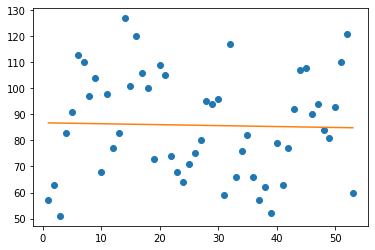

In [62]:
plt.plot(x, y, 'o')
a, b= np.polyfit(x, y, 1)
plt.plot(x, a*x + b)

In [63]:
x_2=Jpmorgan1['Producto_Financiero']**2
d2 = {"x":x, "x_2":x_2}
X_2=pd.DataFrame(d2)
mod3=build_model(X_2,y)

                             OLS Regression Results                            
Dep. Variable:     Producto_Financiero   R-squared:                       0.988
Model:                             OLS   Adj. R-squared:                  0.987
Method:                  Least Squares   F-statistic:                     1984.
Date:                 Tue, 12 Oct 2021   Prob (F-statistic):           2.37e-48
Time:                         23:22:53   Log-Likelihood:                -117.06
No. Observations:                   53   AIC:                             240.1
Df Residuals:                       50   BIC:                             246.0
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.4547      0.958     43.26

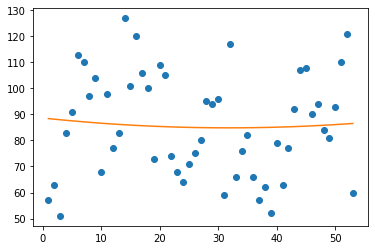

In [64]:
plt.plot(x, y, 'o')
a,b,c = np.polyfit(x, y, 2)
plt.plot(x, a*x*x +b*x + c)

In [65]:
X_2=sm.add_constant(X_2)
y_pred = sm.OLS(y,X_2).fit().predict([1,60,60**2]) #lo que está dentro del arreglo es lo que multiplica a las betas, incluyendo B0
y_pred

array([62.63084949])

In [66]:
#Fit model
y=Banka1['Producto_Financiero']
x=Banka1['Numeros']
d = {"x": x}
X=pd.DataFrame(d)

In [67]:
model1=build_model(X,y)

                             OLS Regression Results                            
Dep. Variable:     Producto_Financiero   R-squared:                       0.367
Model:                             OLS   Adj. R-squared:                  0.354
Method:                  Least Squares   F-statistic:                     29.52
Date:                 Tue, 12 Oct 2021   Prob (F-statistic):           1.56e-06
Time:                         23:22:53   Log-Likelihood:                -279.86
No. Observations:                   53   AIC:                             563.7
Df Residuals:                       51   BIC:                             567.7
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        219.3244     13.504     16.24

In [68]:
checkVIF(model1)

,Variables,VIF
0,const,4.12
1,x,1.00


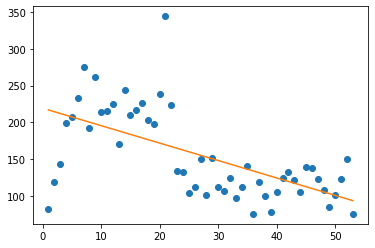

In [69]:
plt.plot(x, y, 'o')
a, b= np.polyfit(x, y, 1)
plt.plot(x, a*x + b)

In [70]:
x_2=Banka1['Producto_Financiero']**2
d2 = {"x":x, "x_2":x_2}
X_2=pd.DataFrame(d2)
mod3=build_model(X_2,y)

                             OLS Regression Results                            
Dep. Variable:     Producto_Financiero   R-squared:                       0.967
Model:                             OLS   Adj. R-squared:                  0.966
Method:                  Least Squares   F-statistic:                     729.5
Date:                 Tue, 12 Oct 2021   Prob (F-statistic):           1.02e-37
Time:                         23:22:54   Log-Likelihood:                -201.68
No. Observations:                   53   AIC:                             409.4
Df Residuals:                       50   BIC:                             415.3
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         93.7374      5.210     17.99

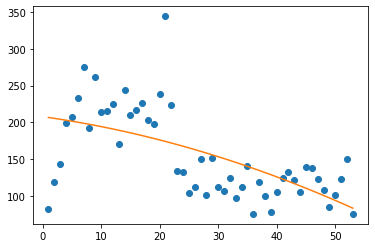

In [71]:
plt.plot(x, y, 'o')
a,b,c = np.polyfit(x, y, 2)
plt.plot(x, a*x*x +b*x + c)

In [72]:
X_2=sm.add_constant(X_2)
y_pred = sm.OLS(y,X_2).fit().predict([1,60,60**2]) #lo que está dentro del arreglo es lo que multiplica a las betas, incluyendo B0
y_pred

array([83.69548544])

In [73]:
#Fit model
y=Wells1['Producto_Financiero']
x=Wells1['Numeros']
d = {"x": x}
X=pd.DataFrame(d)

In [74]:
model1=build_model(X,y)

                             OLS Regression Results                            
Dep. Variable:     Producto_Financiero   R-squared:                       0.019
Model:                             OLS   Adj. R-squared:                 -0.000
Method:                  Least Squares   F-statistic:                    0.9905
Date:                 Tue, 12 Oct 2021   Prob (F-statistic):              0.324
Time:                         23:22:54   Log-Likelihood:                -255.38
No. Observations:                   53   AIC:                             514.8
Df Residuals:                       51   BIC:                             518.7
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        122.3483      8.508     14.38

In [75]:
checkVIF(model1)

,Variables,VIF
0,const,4.12
1,x,1.00


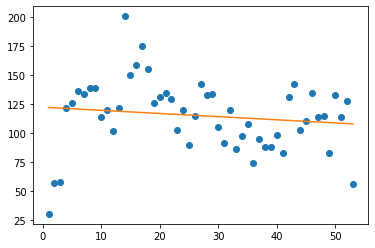

In [76]:
plt.plot(x, y, 'o')
a, b= np.polyfit(x, y, 1)
plt.plot(x, a*x + b)

In [77]:
x_2=Wells1['Producto_Financiero']**2
d2 = {"x":x, "x_2":x_2}
X_2=pd.DataFrame(d2)
mod3=build_model(X_2,y)

                             OLS Regression Results                            
Dep. Variable:     Producto_Financiero   R-squared:                       0.954
Model:                             OLS   Adj. R-squared:                  0.953
Method:                  Least Squares   F-statistic:                     524.1
Date:                 Tue, 12 Oct 2021   Prob (F-statistic):           2.87e-34
Time:                         23:22:55   Log-Likelihood:                -174.02
No. Observations:                   53   AIC:                             354.0
Df Residuals:                       50   BIC:                             360.0
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         50.9370      2.897     17.58

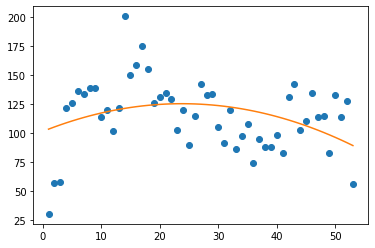

In [78]:
plt.plot(x, y, 'o')
a,b,c = np.polyfit(x, y, 2)
plt.plot(x, a*x*x +b*x + c)

In [79]:
X_2=sm.add_constant(X_2)
y_pred = sm.OLS(y,X_2).fit().predict([1,60,60**2]) #lo que está dentro del arreglo es lo que multiplica a las betas, incluyendo B0
y_pred

array([73.86058151])

In [80]:
#Fit model
y=Citi1['Producto_Financiero']
x=Citi1['Numeros']
d = {"x": x}
X=pd.DataFrame(d)

In [81]:
model1=build_model(X,y)

                             OLS Regression Results                            
Dep. Variable:     Producto_Financiero   R-squared:                       0.173
Model:                             OLS   Adj. R-squared:                  0.157
Method:                  Least Squares   F-statistic:                     10.66
Date:                 Tue, 12 Oct 2021   Prob (F-statistic):            0.00196
Time:                         23:22:55   Log-Likelihood:                -211.13
No. Observations:                   53   AIC:                             426.3
Df Residuals:                       51   BIC:                             430.2
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         42.7562      3.692     11.58

In [82]:
checkVIF(model1)

,Variables,VIF
0,const,4.12
1,x,1.00


In [83]:
x_2=Citi1['Producto_Financiero']**2
d2 = {"x":x, "x_2":x_2}
X_2=pd.DataFrame(d2)
mod3=build_model(X_2,y)

                             OLS Regression Results                            
Dep. Variable:     Producto_Financiero   R-squared:                       0.972
Model:                             OLS   Adj. R-squared:                  0.971
Method:                  Least Squares   F-statistic:                     871.2
Date:                 Tue, 12 Oct 2021   Prob (F-statistic):           1.38e-39
Time:                         23:22:56   Log-Likelihood:                -121.31
No. Observations:                   53   AIC:                             248.6
Df Residuals:                       50   BIC:                             254.5
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         27.9332      0.789     35.41

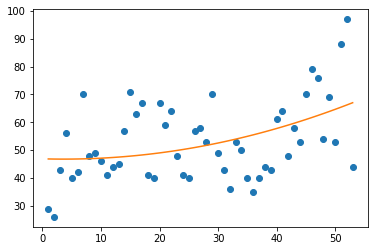

In [84]:
plt.plot(x, y, 'o')
a,b,c = np.polyfit(x, y, 2)
plt.plot(x, a*x*x +b*x + c)

In [85]:
X_2=sm.add_constant(X_2)
y_pred = sm.OLS(y,X_2).fit().predict([1,60,60**2]) #lo que está dentro del arreglo es lo que multiplica a las betas, incluyendo B0
y_pred

array([58.12145968])

In [86]:
#Fit model
y=Bancorp1['Producto_Financiero']
x=Bancorp1['Numeros']
d = {"x": x}
X=pd.DataFrame(d)

In [87]:
model1=build_model(X,y)

                             OLS Regression Results                            
Dep. Variable:     Producto_Financiero   R-squared:                       0.366
Model:                             OLS   Adj. R-squared:                  0.354
Method:                  Least Squares   F-statistic:                     29.49
Date:                 Tue, 12 Oct 2021   Prob (F-statistic):           1.58e-06
Time:                         23:22:56   Log-Likelihood:                -179.45
No. Observations:                   53   AIC:                             362.9
Df Residuals:                       51   BIC:                             366.8
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.1981      2.031      7.48

In [88]:
checkVIF(model1)

,Variables,VIF
0,const,4.12
1,x,1.00


In [89]:
x_2=Bancorp1['Producto_Financiero']**2
d2 = {"x":x, "x_2":x_2}
X_2=pd.DataFrame(d2)
mod3=build_model(X_2,y)

                             OLS Regression Results                            
Dep. Variable:     Producto_Financiero   R-squared:                       0.955
Model:                             OLS   Adj. R-squared:                  0.953
Method:                  Least Squares   F-statistic:                     527.4
Date:                 Tue, 12 Oct 2021   Prob (F-statistic):           2.47e-34
Time:                         23:22:56   Log-Likelihood:                -109.52
No. Observations:                   53   AIC:                             225.0
Df Residuals:                       50   BIC:                             230.9
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.7170      0.576     18.61

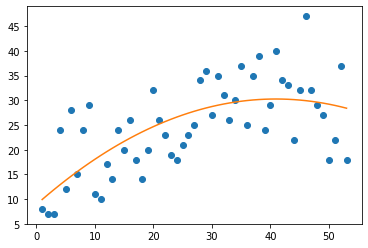

In [90]:
plt.plot(x, y, 'o')
a,b,c = np.polyfit(x, y, 2)
plt.plot(x, a*x*x +b*x + c)

In [91]:
X_2=sm.add_constant(X_2)
y_pred = sm.OLS(y,X_2).fit().predict([1,60,60**2]) #lo que está dentro del arreglo es lo que multiplica a las betas, incluyendo B0
y_pred

array([79.69854381])

# Conclusión

Haciendo ajustes y procedimientos a nuestra base de datos, la técnica de Regresión Lineal Simple nos ayudó analizar la tendencia de los clientes sastifechos en los 5 bancos más grandes de USA (los cuales se obtuvieron de una pequeña investigación fuera de nuestro estudio), y hacer nuestra predicción de la cantidad de clientes satisfechos dentro de 6 meses, los cuales fueron:

- **Citi Group:** 59 clientes
- **JP Morgan:** 63 clientes
- **Wells Fargo:** 74 clientes
- **US Bancorp:** 80 clientes
- **Bank of America:** 84 clientes

Por lo que el Banco "Bank of America" es el mejor con mayor estimación de clientes satisfechos. Y de estos bancos, el estado con mayor número de quejas fue California; Recordemos que en nuestro estudio anterior, California fue el estado con mayor quejas y mayor satisfacción al cliente.